# Understanding the role of $\gamma$

In [1]:
from kd_ub import kd_traj
import numpy as np
import matplotlib.pyplot as plt

/Users/rajit906/Downloads/PhD/PhD_Research/Current/Kinetic_Descent/toy/kd_ub.py:57: RuntimeWarning: overflow encountered in cosh
  A = np.cosh(kappa) / np.cosh(alpha * h + kappa)
/Users/rajit906/Downloads/PhD/PhD_Research/Current/Kinetic_Descent/toy/kd_ub.py:58: RuntimeWarning: overflow encountered in sinh
  B = (np.sinh(alpha * h + kappa) - np.sinh(kappa)) / (alpha * np.cosh(alpha * h + kappa))
/Users/rajit906/Downloads/PhD/PhD_Research/Current/Kinetic_Descent/toy/kd_ub.py:58: RuntimeWarning: overflow encountered in cosh
  B = (np.sinh(alpha * h + kappa) - np.sinh(kappa)) / (alpha * np.cosh(alpha * h + kappa))
/Users/rajit906/Downloads/PhD/PhD_Research/Current/Kinetic_Descent/toy/kd_ub.py:58: RuntimeWarning: invalid value encountered in scalar divide
  B = (np.sinh(alpha * h + kappa) - np.sinh(kappa)) / (alpha * np.cosh(alpha * h + kappa))
/Users/rajit906/Downloads/PhD/PhD_Research/Current/Kinetic_Descent/toy/kd_ub.py:55: RuntimeWarning: divide by zero encountered in arctanh
  kappa =

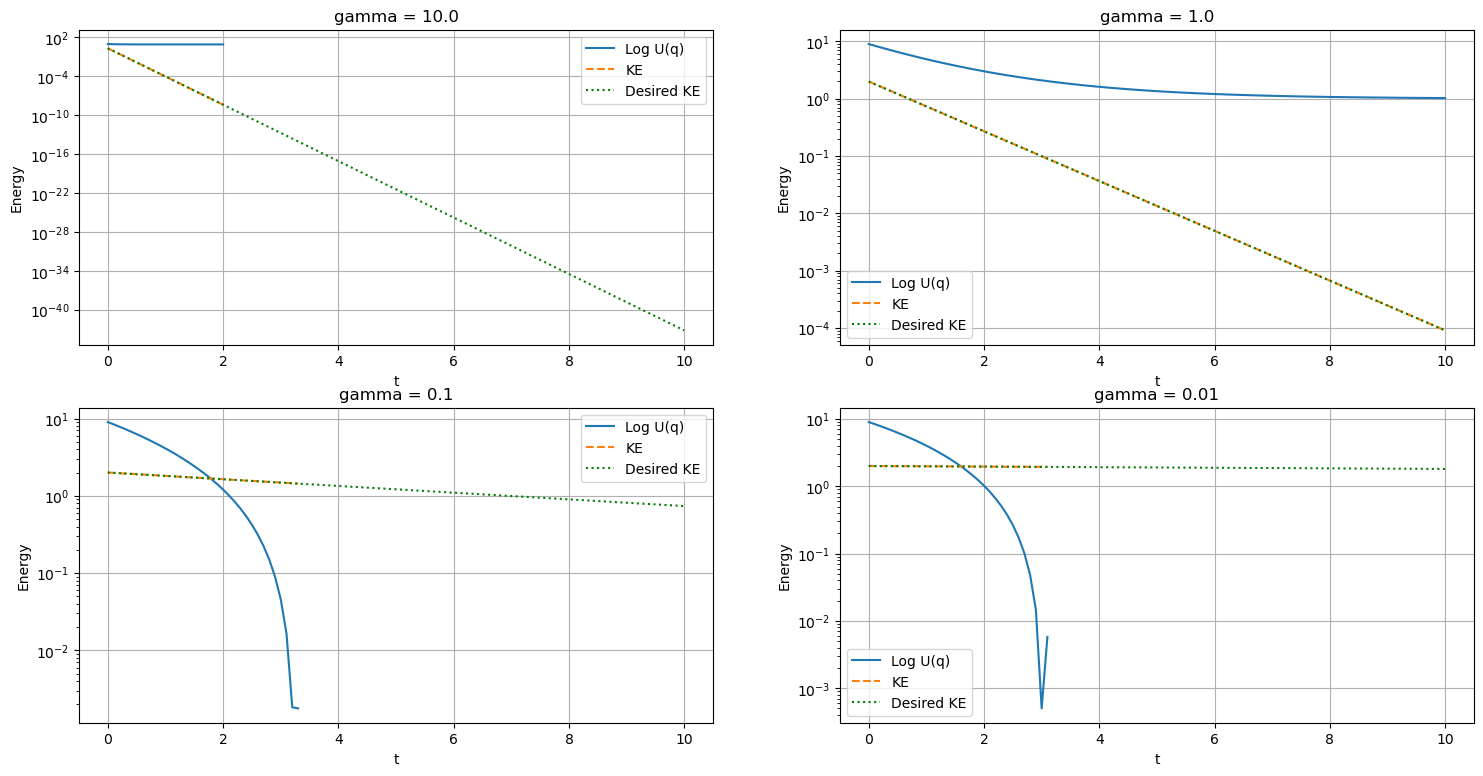

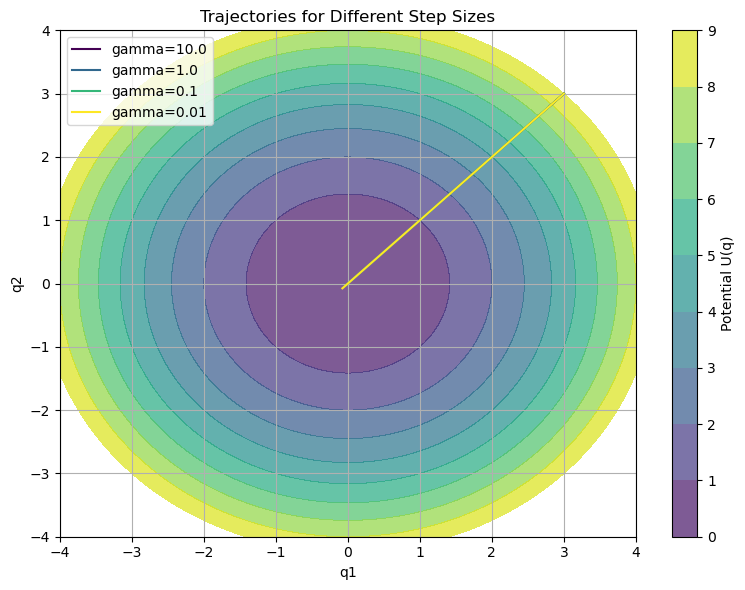

In [20]:
# Define parameters
Pars = {}
decay_exp = {
        'c': lambda t, P: np.exp(-P['gamma'] * t),
        'cp': lambda t, P: -P['gamma'] * np.exp(-P['gamma'] * t),
        'csqrt': lambda t, P: np.sqrt(np.exp(-P['gamma'] * t))
    }
Pars['decay'] = decay_exp
Model = {}

U_quad = lambda x, _: 0.5 * (x[0]**2 + x[1]**2)
F_quad = lambda x, _: -np.array([x[0], x[1]])

Model['U'] = U_quad
Model['F'] = F_quad

# Step sizes to test
gammas = [10., 1., 0.1, 0.01]
T_final = 10  # Keep total simulation time fixed
trajectories = {}
h = 0.1
Ns = int(T_final / h)

# Compute trajectories for each step size
for gamma in gammas:
    Pars['gamma'] = gamma
    x0 = np.array([3., 3.])
    p0 = F_quad(x0, Pars)
    p0 /= np.linalg.norm(p0)
    p0 *= np.sqrt(2)

    T, X, P, KE, PE = kd_traj(x0, p0, h, Ns, Pars, Model)
    trajectories[gamma] = (T, X, P, KE, PE)

# Plot all trajectories on a single contour plot
fig, axs = plt.subplots(2, 2, figsize=(18, 9))

x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
X_grid, Y_grid = np.meshgrid(x, y)
Z = 0.5 * (X_grid**2 + Y_grid**2)

fig_contour, ax_contour = plt.subplots(figsize=(8, 6))
contourf = ax_contour.contourf(X_grid, Y_grid, Z, levels=np.linspace(0, 9, 10), cmap='viridis', alpha=0.7)
fig.colorbar(contourf, ax=ax_contour, label='Potential U(q)')

# Plot each trajectory
colors = plt.cm.viridis(np.linspace(0, 1, len(gammas)))
for i, gamma in enumerate(gammas):
    _, X, _, _, _ = trajectories[gamma]
    ax_contour.plot(X[:, 0], X[:, 1], label=f'gamma={gamma}', color=colors[i], lw=1.5)

ax_contour.set_xlabel('q1')
ax_contour.set_ylabel('q2')
ax_contour.set_title('Trajectories for Different Step Sizes')
ax_contour.legend()
ax_contour.grid(True)

# Plot log potential and kinetic energy in a 2x4 grid
for i, gamma in enumerate(gammas):
    T, _, _, KE, PE = trajectories[gamma]

    row, col = divmod(i, 2)

    # Log potential energy plot
    axs[row, col].semilogy(T, PE, label='Log U(q)')
    axs[row, col].semilogy(T, KE, label='KE', linestyle='dashed')
    axs[row, col].semilogy(T, 2 * np.exp(-gamma * T), label='Desired KE', color='green', linestyle='dotted')

    axs[row, col].set_title(f'gamma = {gamma}')
    axs[row, col].set_xlabel('t')
    axs[row, col].set_ylabel('Energy')
    axs[row, col].legend()
    axs[row, col].grid(True)

plt.tight_layout()
plt.show()

# Rosenbrock

/Users/rajit906/Downloads/PhD/PhD_Research/Current/Kinetic_Descent/toy/kd_ub.py:57: RuntimeWarning: overflow encountered in cosh
  A = np.cosh(kappa) / np.cosh(alpha * h + kappa)
/Users/rajit906/Downloads/PhD/PhD_Research/Current/Kinetic_Descent/toy/kd_ub.py:58: RuntimeWarning: overflow encountered in sinh
  B = (np.sinh(alpha * h + kappa) - np.sinh(kappa)) / (alpha * np.cosh(alpha * h + kappa))
/Users/rajit906/Downloads/PhD/PhD_Research/Current/Kinetic_Descent/toy/kd_ub.py:58: RuntimeWarning: overflow encountered in cosh
  B = (np.sinh(alpha * h + kappa) - np.sinh(kappa)) / (alpha * np.cosh(alpha * h + kappa))
/Users/rajit906/Downloads/PhD/PhD_Research/Current/Kinetic_Descent/toy/kd_ub.py:58: RuntimeWarning: invalid value encountered in scalar divide
  B = (np.sinh(alpha * h + kappa) - np.sinh(kappa)) / (alpha * np.cosh(alpha * h + kappa))
/Users/rajit906/Downloads/PhD/PhD_Research/Current/Kinetic_Descent/toy/kd_ub.py:50: RuntimeWarning: invalid value encountered in divide
  F_tilde, 

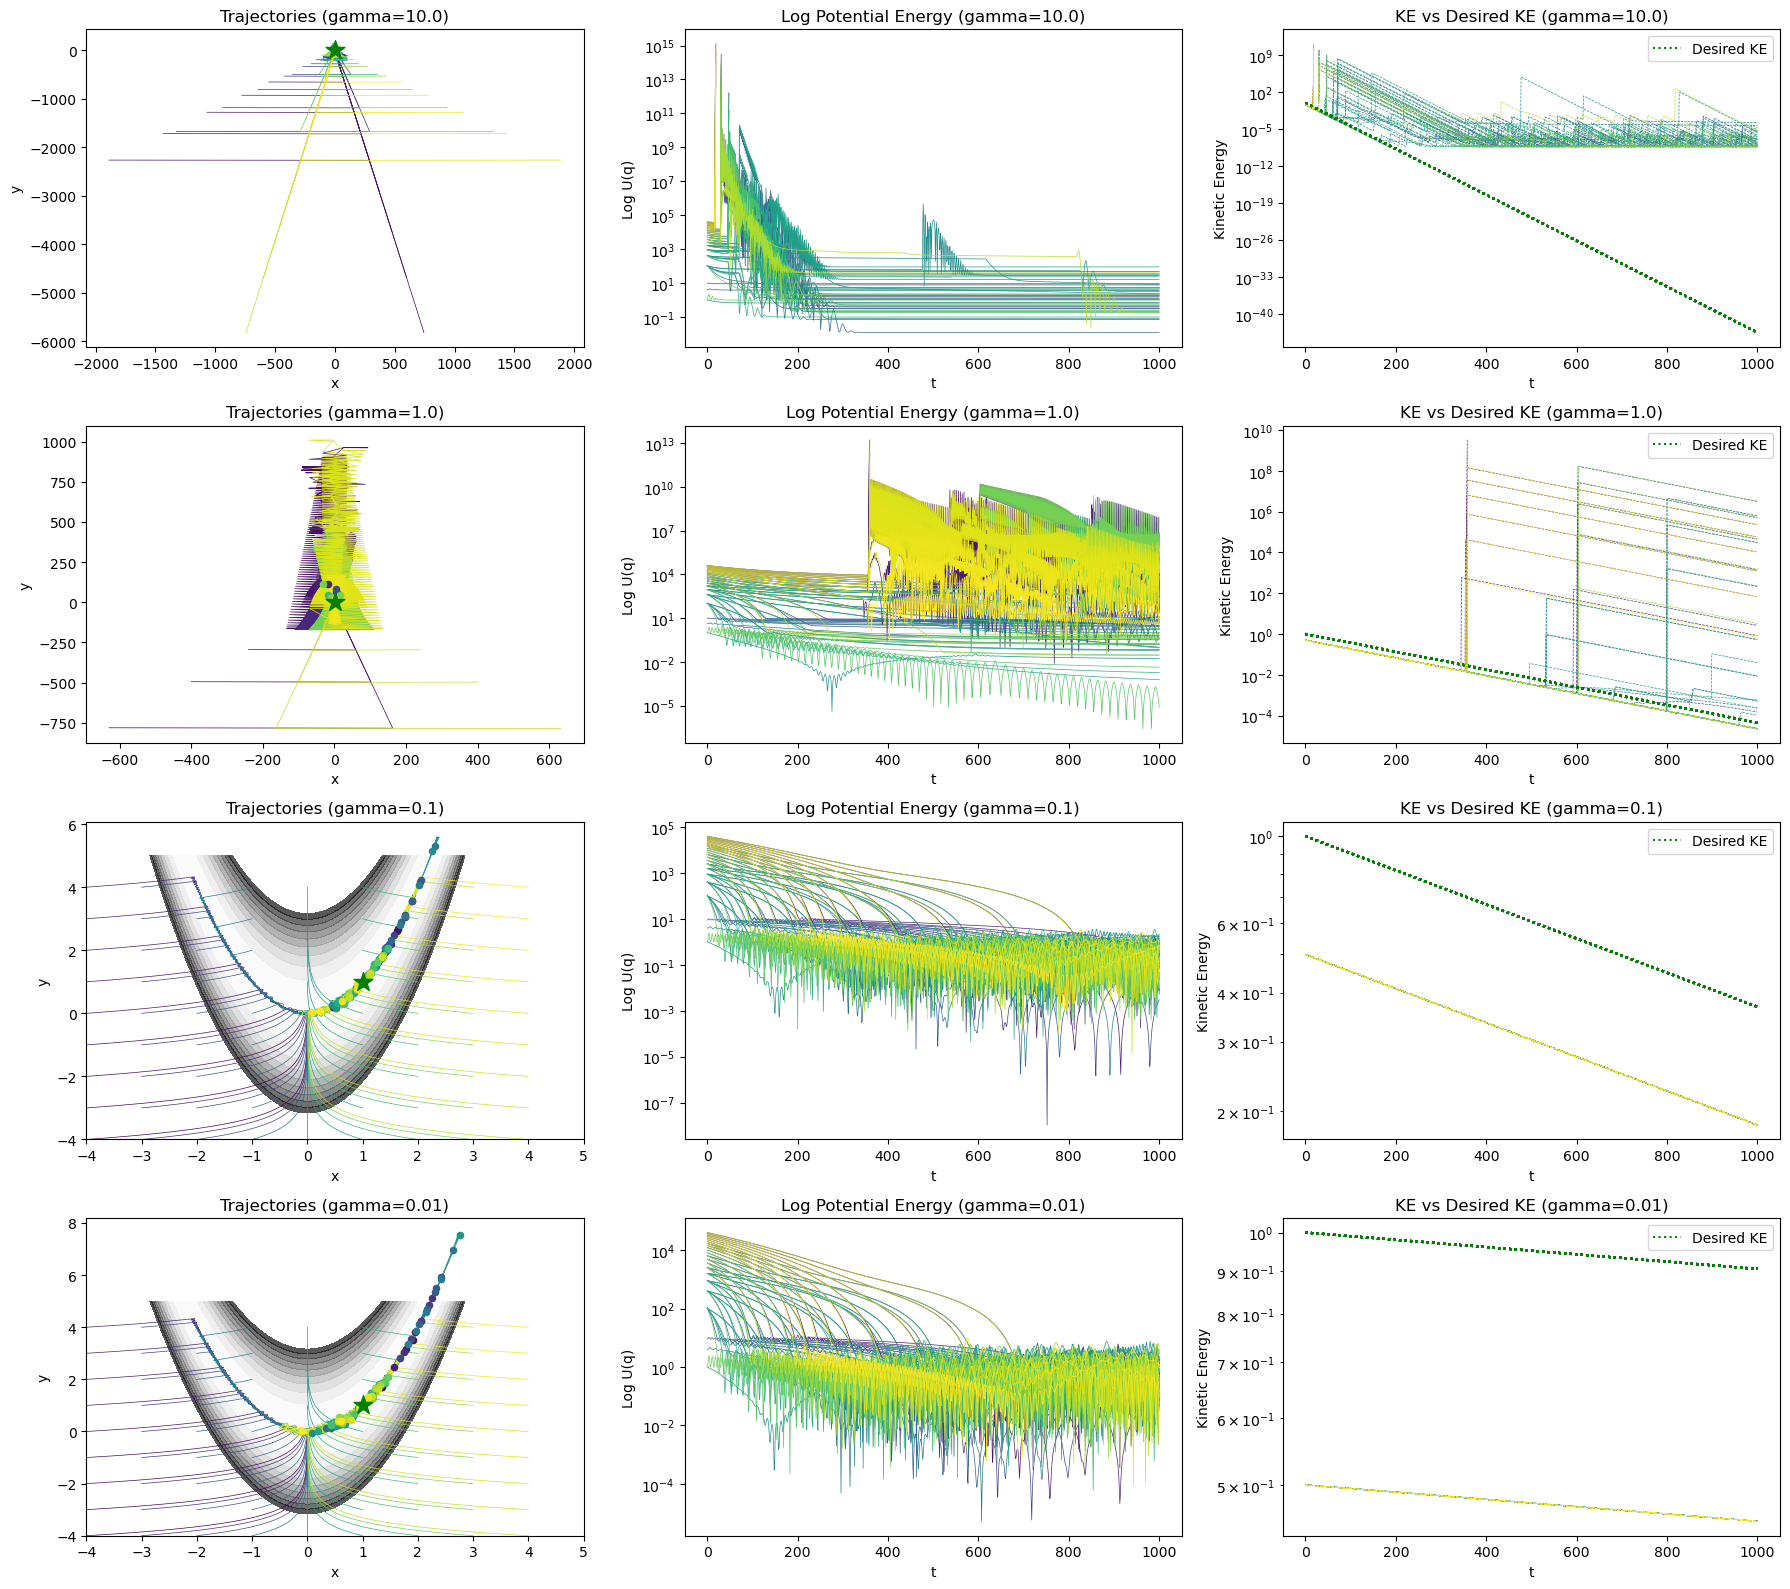

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from kd_ub import kd_traj

def U_rosenbrock(x, P):
    return (P['coeff'][0] - x[0])**2 + P['coeff'][1] * (x[1] - x[0]**2)**2

def F_rosenbrock(x, P):
    return -np.array([
        -2 * (P['coeff'][0] - x[0]) - 4 * P['coeff'][1] * (x[1] - x[0]**2) * x[0],
        2 * P['coeff'][1] * (x[1] - x[0]**2)
    ]).astype(float)

# Define the parameters and setup
Pars = {
    'gamma': .1,
    'coeff': [1, 100],
    'decay': {
        'c': lambda t, P: np.exp(-P['gamma'] * t),
        'cp': lambda t, P: -P['gamma'] * np.exp(-P['gamma'] * t),
        'csqrt': lambda t, P: np.sqrt(np.exp(-P['gamma'] * t))
    }
}
Model = {'U': U_rosenbrock, 'F': F_rosenbrock}
gammas = [10., 1., 0.1, 0.01]
T_final = 10  # Fixed total simulation time
h = 0.01
Ns = int(T_final / h)

# Define the grid for contour plot
x_vals = np.linspace(-4, 5, 100)
y_vals = np.linspace(-4, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = np.array([[U_rosenbrock([x, y], Pars) for x, y in zip(x_row, y_row)] for x_row, y_row in zip(X, Y)])

# Initialize trajectory starting points
x_grid = np.array([[i, j] for i in range(-4, 5) for j in range(-4, 5)])
num_trajectories = len(x_grid)
colors = plt.cm.viridis(np.linspace(0, 1, num_trajectories))  # Unique colors per trajectory

# Create figure layout
fig, axs = plt.subplots(len(gammas), 3, figsize=(18, 4 * len(gammas)))

for row, gamma in enumerate(gammas):
    Pars['gamma'] = gamma
    # Plot contour and trajectories
    axs[row, 0].contourf(X, Y, Z, levels=np.linspace(0, 1000, 10), cmap='Greys', alpha=0.7)

    for idx, x0 in enumerate(x_grid):
        color = colors[idx]
        p0 = F_rosenbrock(x0, Pars)
        p0 /= np.linalg.norm(p0) if np.linalg.norm(p0) != 0 else 1
        T, X_traj, P, KE, PE = kd_traj(x0, p0, h, Ns, Pars, Model)
        X_traj = np.array(X_traj)

        # Plot trajectory
        axs[row, 0].plot(X_traj[:, 0], X_traj[:, 1], linewidth=0.5, color=color, zorder=1)
        axs[row, 0].scatter(X_traj[-1, 0], X_traj[-1, 1], color=color, s=20, zorder=2)  # Mark end point

        # Plot loss (log potential energy)
        axs[row, 1].semilogy(T/h, PE, linewidth=0.5, color=color)

        # Plot kinetic energy vs desired KE
        axs[row, 2].semilogy(T/h, 0.5 * KE, linewidth=0.5, color=color, linestyle='dashed')
        axs[row, 2].semilogy(T/h, np.exp(-gamma * T), color='green', linestyle='dotted', label='Desired KE' if idx == 0 else None)

    # Labels and titles
    axs[row, 0].scatter(1, 1, color='green', s=200, marker='*', label='Global Minimum', zorder=2)
    axs[row, 0].set_xlabel('x')
    axs[row, 0].set_ylabel('y')
    axs[row, 0].set_title(f'Trajectories (gamma={gamma})')

    axs[row, 1].set_xlabel('t')
    axs[row, 1].set_ylabel('Log U(q)')
    axs[row, 1].set_title(f'Log Potential Energy (gamma={gamma})')

    axs[row, 2].set_xlabel('t')
    axs[row, 2].set_ylabel('Kinetic Energy')
    axs[row, 2].set_title(f'KE vs Desired KE (gamma={gamma})')
    axs[row, 2].legend()

plt.tight_layout()
plt.show()


# Matyas and Ackley